In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_csv("cleaned_df_luxottica_churn_updated_0108.csv", index_col=None)

In [3]:
# Create a copy of the dataset for transformation
dataset_transformed = pd.get_dummies(dataset, drop_first=True)

In [4]:
# Separate features and target variable
X = dataset_transformed.drop('Churn_Yes', axis=1)
y = dataset_transformed['Churn_Yes']

In [5]:
# Apply Min-Max scaling to ensure non-negative values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [6]:
# Initialize lists to store results
num_features = list(range(1, 15)) 
accuracies = []


In [7]:
# Loop through different numbers of features
for k in num_features:
    # Select top k features using Chi-Square
    select_k_best = SelectKBest(score_func=chi2, k=k)
    X_selected = select_k_best.fit_transform(X_scaled, y)

In [8]:
# Get the selected feature indices and names
selected_features_indices = select_k_best.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

In [9]:
# Create the final feature dataset with selected features
    
X_final_selected = X[selected_features]

In [10]:
X_final_selected

,Age,Price,Customer_Support_Interactions,Customer_Satisfaction,Purchase_Frequency,Lifetime_Value,Average_Order_Value,Number_of_Product_Categories_Purchased,Date_of_First_Purchase_2016-11-02,Date_of_First_Purchase_2020-10-09,Last_Purchase_Date_2022-07-13,Loyalty_Program_Participation_Inactive,Engagement_with_Promotions_Low,Engagement_with_Promotions_Medium
0,62.0,214.690000,8.0,4.590000,10.0,1738.968150,233.902744,3.0,0,0,0,0,0,0
1,21.0,314.772739,2.0,5.853082,4.0,9799.820000,833.200000,2.0,0,0,0,1,1,0
2,28.0,232.969400,9.0,1.131831,4.0,7027.470000,727.390000,1.0,0,0,0,1,1,0
3,21.0,457.880000,4.0,9.570000,13.0,6900.180000,772.635501,2.0,0,0,0,0,1,0
4,57.0,745.030000,5.0,6.570000,18.0,10923.306090,465.561789,2.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95097,41.0,230.500000,8.0,8.225604,4.0,9446.040000,255.330000,2.0,0,0,0,1,1,0
95098,56.0,398.070000,9.0,6.110000,10.0,11065.039920,314.938230,3.0,0,0,0,0,0,1
95099,31.0,526.098494,7.0,8.148891,4.0,6468.370000,239.310000,2.0,0,0,0,1,1,0
95100,26.0,248.540000,9.0,3.470000,16.0,2136.218717,685.872736,3.0,0,0,0,0,1,0


In [12]:
# Apply Min-Max scaling to the selected features
X_scaled_selected = min_max_scaler.fit_transform(X_final_selected)

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_selected, y, test_size=0.25, random_state=0)

In [14]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [15]:
# Initialize and train the Random Forest classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=0)

In [16]:
# Predict the test set results
y_pred = classifier.predict(X_test)

In [17]:
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print(f'Accuracy with top {k} features: {accuracy:.4f}')

Accuracy with top 14 features: 0.9982


ValueError: x and y must have same first dimension, but have shapes (14,) and (1,)

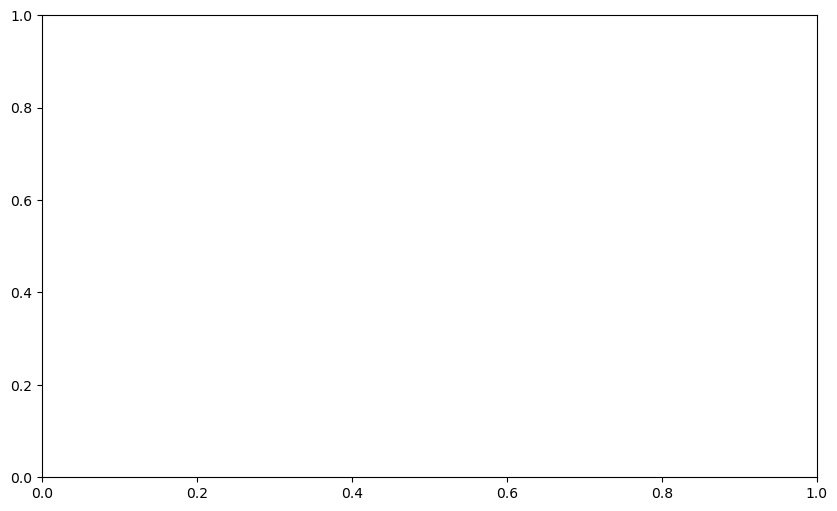

In [18]:
# Plot the results to visualize the accuracy for different numbers of features
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, marker='o')
plt.title('Accuracy vs. Number of Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [19]:
# Choose the best number of features based on the highest accuracy
best_k = num_features[accuracies.index(max(accuracies))]
print(f'Best number of features: {best_k}')

Best number of features: 1


In [20]:
# Loop through different numbers of features
for k in num_features:
    # Select top k features using Chi-Square
    select_k_best = SelectKBest(score_func=chi2, k=k)
    X_selected = select_k_best.fit_transform(X_scaled, y)

    # Get the selected feature indices and names
    selected_features_indices = select_k_best.get_support(indices=True)
    selected_features = X.columns[selected_features_indices]

    # Create the final feature dataset with selected features
    X_final_selected = X[selected_features]
    
    # Apply Min-Max scaling to the selected features
    X_scaled_selected = min_max_scaler.fit_transform(X_final_selected)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_selected, y, test_size=0.25, random_state=0)

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=0)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Initialize and train the Random Forest classifier
    classifier = RandomForestClassifier(random_state=0)
    classifier.fit(X_train_resampled, y_train_resampled)

    # Predict the test set results
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with top {k} features: {accuracy:.4f}')

Accuracy with top 1 features: 0.7373
Accuracy with top 2 features: 0.9864
Accuracy with top 3 features: 0.9864
Accuracy with top 4 features: 0.9953
Accuracy with top 5 features: 0.9974
Accuracy with top 6 features: 0.9974
Accuracy with top 7 features: 0.9972
Accuracy with top 8 features: 0.9980
Accuracy with top 9 features: 0.9981
Accuracy with top 10 features: 0.9981
Accuracy with top 11 features: 0.9982
Accuracy with top 12 features: 0.9982
Accuracy with top 13 features: 0.9982
Accuracy with top 14 features: 0.9982


ValueError: x and y must have same first dimension, but have shapes (14,) and (15,)

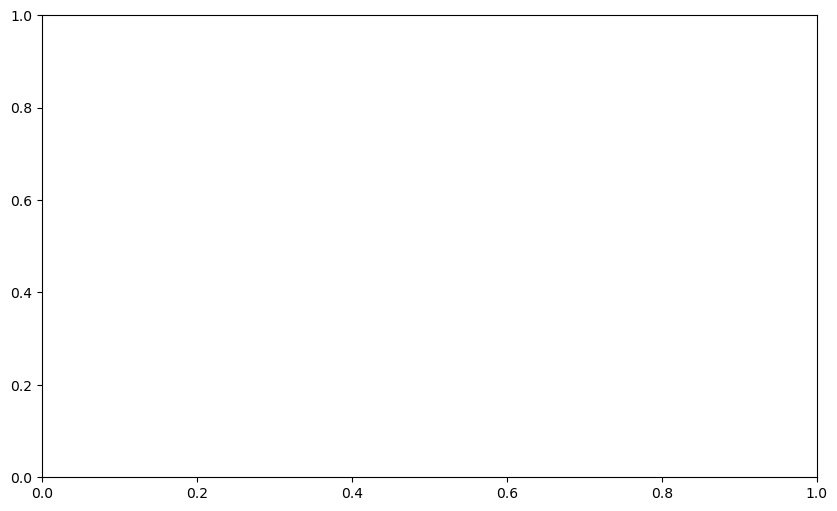

In [22]:
# Plot the results to visualize the accuracy for different numbers of features
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, marker='o')
plt.title('Accuracy vs. Number of Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Accuracy with top 1 features: 0.7373
Accuracy with top 2 features: 0.9864
Accuracy with top 3 features: 0.9864
Accuracy with top 4 features: 0.9953
Accuracy with top 5 features: 0.9974
Accuracy with top 6 features: 0.9974
Accuracy with top 7 features: 0.9972
Accuracy with top 8 features: 0.9980
Accuracy with top 9 features: 0.9981
Accuracy with top 10 features: 0.9981
Accuracy with top 11 features: 0.9982
Accuracy with top 12 features: 0.9982
Accuracy with top 13 features: 0.9982


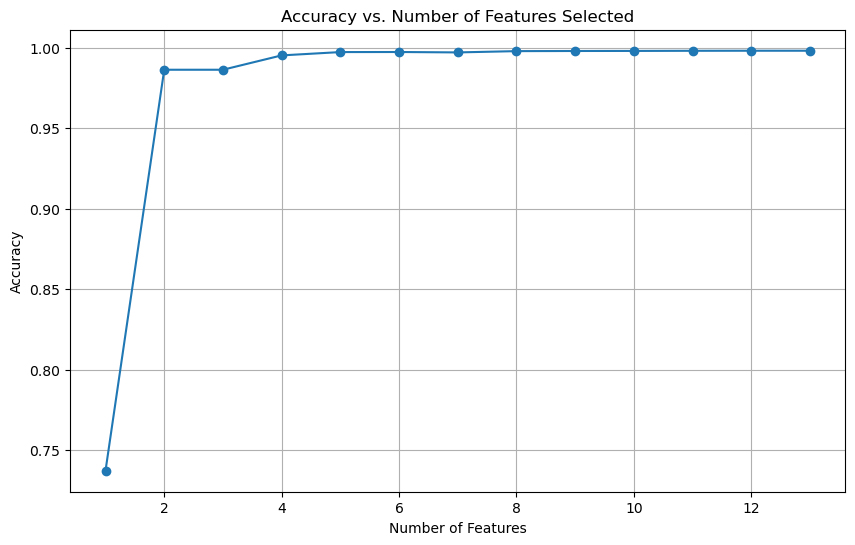

Best number of features: 12
Confusion Matrix:
 [[17145    42]
 [    0  6589]]
Accuracy: 0.9982335127860027
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17187
           1       0.99      1.00      1.00      6589

    accuracy                           1.00     23776
   macro avg       1.00      1.00      1.00     23776
weighted avg       1.00      1.00      1.00     23776



In [25]:
# Load the dataset
dataset = pd.read_csv("cleaned_df_luxottica_churn_updated_0108.csv", index_col=None)

# Create a copy of the dataset for transformation
dataset_transformed = pd.get_dummies(dataset, drop_first=True)

# Separate features and target variable
X = dataset_transformed.drop('Churn_Yes', axis=1)
y = dataset_transformed['Churn_Yes']

# Apply Min-Max scaling to ensure non-negative values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

# Initialize lists to store results
num_features = list(range(1, 14))  # Increment by 100 for efficiency
accuracies = []

# Loop through different numbers of features
for k in num_features:
    # Select top k features using Chi-Square
    select_k_best = SelectKBest(score_func=chi2, k=k)
    X_selected = select_k_best.fit_transform(X_scaled, y)

    # Get the selected feature indices and names
    selected_features_indices = select_k_best.get_support(indices=True)
    selected_features = X.columns[selected_features_indices]

    # Create the final feature dataset with selected features
    X_final_selected = X[selected_features]
    
    # Apply Min-Max scaling to the selected features
    X_scaled_selected = min_max_scaler.fit_transform(X_final_selected)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_selected, y, test_size=0.25, random_state=0)

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=0)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Initialize and train the Random Forest classifier
    classifier = RandomForestClassifier(random_state=0)
    classifier.fit(X_train_resampled, y_train_resampled)

    # Predict the test set results
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with top {k} features: {accuracy:.4f}')

# Plot the results to visualize the accuracy for different numbers of features
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, marker='o')
plt.title('Accuracy vs. Number of Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Choose the best number of features based on the highest accuracy
best_k = num_features[accuracies.index(max(accuracies))]
print(f'Best number of features: {best_k}')

# Select top features using Chi-Square with the best number of features
select_k_best = SelectKBest(score_func=chi2, k=best_k)
X_selected = select_k_best.fit_transform(X_scaled, y)

# Get the selected feature indices and names
selected_features_indices = select_k_best.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

# Create the final feature dataset with selected features
X_final_selected = X[selected_features]

# Apply Min-Max scaling to the selected features
X_scaled_selected = min_max_scaler.fit_transform(X_final_selected)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_selected, y, test_size=0.25, random_state=0)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Random Forest classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train_resampled, y_train_resampled)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

In [26]:
selected_features

Index(['Age', 'Price', 'Customer_Support_Interactions',
       'Customer_Satisfaction', 'Purchase_Frequency', 'Lifetime_Value',
       'Average_Order_Value', 'Number_of_Product_Categories_Purchased',
       'Date_of_First_Purchase_2020-10-09',
       'Loyalty_Program_Participation_Inactive',
       'Engagement_with_Promotions_Low', 'Engagement_with_Promotions_Medium'],
      dtype='object')

In [27]:
selected_features_indices

array([   0,    1,    3,    5,    6,   10,   11,   13, 2043, 3299, 3300,
       3301], dtype=int64)

In [32]:
# Save the trained model to a file
model_filename = "finalized_model_random_forest.sav"
pickle.dump(classifier, open(model_filename, 'wb'))

# Example input for prediction (use scaled values)
example_input_unscaled = [[44, 2, 0.45, 4, 1200, 240.6, 1,1, 1, 0, 1,1]]
example_input = min_max_scaler.transform(example_input_unscaled)

# Load the saved model and make a prediction
loaded_model = pickle.load(open(model_filename, 'rb'))
prediction_result = loaded_model.predict(example_input)
prediction_result = prediction_result.astype(int)

print("Prediction result:", prediction_result)


Prediction result: [0]


C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Accuracy with top 1 features: 0.7373
Accuracy with top 2 features: 0.9864
Accuracy with top 3 features: 0.9864
Accuracy with top 4 features: 0.9953
Accuracy with top 5 features: 0.9974
Accuracy with top 6 features: 0.9974
Accuracy with top 7 features: 0.9972
Accuracy with top 8 features: 0.9980
Accuracy with top 9 features: 0.9981
Accuracy with top 10 features: 0.9981
Accuracy with top 11 features: 0.9982


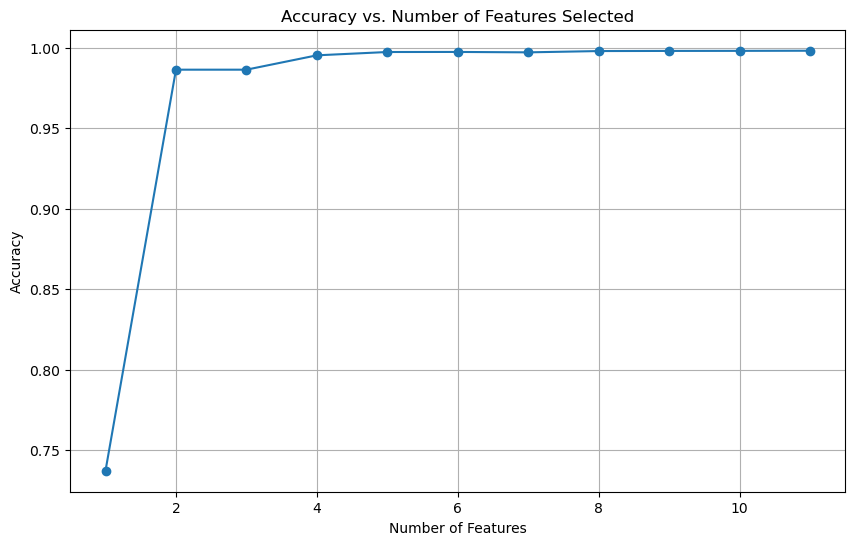

Best number of features: 11
Confusion Matrix:
 [[17144    43]
 [    0  6589]]
Accuracy: 0.9981914535666218
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17187
           1       0.99      1.00      1.00      6589

    accuracy                           1.00     23776
   macro avg       1.00      1.00      1.00     23776
weighted avg       1.00      1.00      1.00     23776



In [33]:
# Load the dataset
dataset = pd.read_csv("cleaned_df_luxottica_churn_updated_0108.csv", index_col=None)

# Create a copy of the dataset for transformation
dataset_transformed = pd.get_dummies(dataset, drop_first=True)

# Separate features and target variable
X = dataset_transformed.drop('Churn_Yes', axis=1)
y = dataset_transformed['Churn_Yes']

# Apply Min-Max scaling to ensure non-negative values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

# Initialize lists to store results
num_features = list(range(1, 12))  
accuracies = []

# Loop through different numbers of features
for k in num_features:
    # Select top k features using Chi-Square
    select_k_best = SelectKBest(score_func=chi2, k=k)
    X_selected = select_k_best.fit_transform(X_scaled, y)

    # Get the selected feature indices and names
    selected_features_indices = select_k_best.get_support(indices=True)
    selected_features = X.columns[selected_features_indices]

    # Create the final feature dataset with selected features
    X_final_selected = X[selected_features]
    
    # Apply Min-Max scaling to the selected features
    X_scaled_selected = min_max_scaler.fit_transform(X_final_selected)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_selected, y, test_size=0.25, random_state=0)

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=0)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Initialize and train the Random Forest classifier
    classifier = RandomForestClassifier(random_state=0)
    classifier.fit(X_train_resampled, y_train_resampled)

    # Predict the test set results
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with top {k} features: {accuracy:.4f}')

# Plot the results to visualize the accuracy for different numbers of features
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, marker='o')
plt.title('Accuracy vs. Number of Features Selected')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Choose the best number of features based on the highest accuracy
best_k = num_features[accuracies.index(max(accuracies))]
print(f'Best number of features: {best_k}')

# Select top features using Chi-Square with the best number of features
select_k_best = SelectKBest(score_func=chi2, k=best_k)
X_selected = select_k_best.fit_transform(X_scaled, y)

# Get the selected feature indices and names
selected_features_indices = select_k_best.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

# Create the final feature dataset with selected features
X_final_selected = X[selected_features]

# Apply Min-Max scaling to the selected features
X_scaled_selected = min_max_scaler.fit_transform(X_final_selected)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_selected, y, test_size=0.25, random_state=0)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Random Forest classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train_resampled, y_train_resampled)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

In [43]:
print("Selected features:",selected_features )

Selected features: Index(['Age', 'Price', 'Customer_Support_Interactions',
       'Customer_Satisfaction', 'Purchase_Frequency', 'Lifetime_Value',
       'Average_Order_Value', 'Number_of_Product_Categories_Purchased',
       'Loyalty_Program_Participation_Inactive',
       'Engagement_with_Promotions_Low', 'Engagement_with_Promotions_Medium'],
      dtype='object')


In [44]:
print("Selected features indices:",selected_features_indices )

Selected features indices: [   0    1    3    5    6   10   11   13 3299 3300 3301]


In [40]:
selected_features

Index(['Age', 'Price', 'Customer_Support_Interactions',
       'Customer_Satisfaction', 'Purchase_Frequency', 'Lifetime_Value',
       'Average_Order_Value', 'Number_of_Product_Categories_Purchased',
       'Loyalty_Program_Participation_Inactive',
       'Engagement_with_Promotions_Low', 'Engagement_with_Promotions_Medium'],
      dtype='object')

In [45]:
# Save the trained model to a file
model_filename = "finalized_model_random_forest.sav"
pickle.dump(classifier, open(model_filename, 'wb'))

# Example input for prediction (use scaled values)
example_input_unscaled = [[73, 502, 8, 7.9, 4, 6453.23,220, 1, 1, 1, 1]]
example_input = min_max_scaler.transform(example_input_unscaled)

# Load the saved model and make a prediction
loaded_model = pickle.load(open(model_filename, 'rb'))
prediction_result = loaded_model.predict(example_input)
prediction_result = prediction_result.astype(int)

print("Prediction result:", prediction_result)

Prediction result: [1]


C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
